# Misinformation Dataset Analysis (EDA & Business Questions)


**Included:**
- Data loading & cleaning
- Feature engineering
- Platform performance analysis
- User & creator behavior
- Topic and content patterns
- Time trends
- Geographic analysis
- Fact-checking & credibility insights


##  1. Import Libraries & Load Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Load dataset

df = pd.read_csv('/Users/deepakpatil/coffee-and-code/data_analyst/Social Media Misinformation Analytics/dataset/generative_ai_misinformation_dataset.csv', parse_dates=['timestamp','date'])

df.head()

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,1,P0001,Reddit,2024-03-06 10:01:00,2024-03-06,10:01:00,March,Wednesday,USA,New York,...,-0.223,0.271,GPT-like,0.829,0.357,TRUE,4,0.543,3899,1
1,2,P0002,Reddit,2025-08-07 18:30:00,2025-08-07,18:30:00,August,Thursday,Germany,Berlin,...,-0.718,0.802,GPT-like,0.075,0.987,FALSE,3,0.199,7651,0
2,3,P0003,Telegram,2024-12-13 03:15:00,2024-12-13,03:15:00,December,Friday,USA,New York,...,-0.989,0.815,GPT-like,0.707,0.729,PARTLY,0,0.074,7260,0
3,4,P0004,Twitter,2024-04-05 07:10:00,2024-04-05,07:10:00,April,Friday,USA,Chicago,...,-0.283,0.116,human,0.863,0.623,FALSE,2,0.064,7454,1
4,5,P0005,Telegram,2024-06-07 06:18:00,2024-06-07,06:18:00,June,Friday,Germany,Hamburg,...,-0.378,0.325,GPT-like,0.730,0.638,PARTLY,0,0.472,8320,0


## 2. Basic Exploration & Dataset Shape

In [6]:
print(df.shape)
df.info()
df.describe(include='all')

(500, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         500 non-null    int64         
 1   post_id                    500 non-null    object        
 2   platform                   500 non-null    object        
 3   timestamp                  500 non-null    datetime64[ns]
 4   date                       500 non-null    datetime64[ns]
 5   time                       500 non-null    object        
 6   month                      500 non-null    object        
 7   weekday                    500 non-null    object        
 8   country                    500 non-null    object        
 9   city                       500 non-null    object        
 10  timezone                   500 non-null    object        
 11  author_id                  500 non-null    object        
 12

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
count,500.000000,500,500,500,500,500,500,500,500,500,...,500.000000,500.000000,500,500.000000,500.000000,500,500.000000,500.000000,500.000000,500.000000
unique,NaN,500,4,NaN,NaN,422,12,7,5,15,...,NaN,NaN,3,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,P0001,Twitter,NaN,NaN,22:49:00,June,Friday,Germany,Los Angeles,...,NaN,NaN,human,NaN,NaN,PARTLY,NaN,NaN,NaN,NaN
freq,NaN,1,129,NaN,NaN,4,65,83,113,51,...,NaN,NaN,174,NaN,NaN,144,NaN,NaN,NaN,NaN
mean,250.500000,NaN,NaN,2024-10-18 05:07:12.840000,2024-10-17 17:11:02.400000,NaN,NaN,NaN,NaN,NaN,...,0.003634,0.495948,NaN,0.485380,0.518882,NaN,2.588000,0.503520,5396.808000,0.536000
min,1.000000,NaN,NaN,2024-01-01 22:35:00,2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,...,-1.000000,0.001000,NaN,0.001000,0.008000,NaN,0.000000,0.002000,4.000000,0.000000
25%,125.750000,NaN,NaN,2024-05-14 07:02:15,2024-05-13 18:00:00,NaN,NaN,NaN,NaN,NaN,...,-0.509250,0.255750,NaN,0.228500,0.272500,NaN,1.000000,0.275000,3049.250000,0.000000
50%,250.500000,NaN,NaN,2024-10-05 08:25:30,2024-10-05 00:00:00,NaN,NaN,NaN,NaN,NaN,...,0.034000,0.504500,NaN,0.478000,0.516000,NaN,3.000000,0.499500,5686.000000,1.000000
75%,375.250000,NaN,NaN,2025-03-29 12:24:15,2025-03-29 00:00:00,NaN,NaN,NaN,NaN,NaN,...,0.508500,0.746500,NaN,0.730750,0.766000,NaN,4.000000,0.746000,7892.750000,1.000000
max,500.000000,NaN,NaN,2025-08-20 20:02:00,2025-08-20 00:00:00,NaN,NaN,NaN,NaN,NaN,...,0.999000,0.997000,NaN,0.994000,1.000000,NaN,5.000000,0.997000,9977.000000,1.000000


## 📌 3. Data Cleaning

In [7]:
# Drop duplicates
df.drop_duplicates(subset=['post_id'], inplace=True)

In [11]:
# Handle missing values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('Unknown')

In [12]:
# Feature engineering
df['author_followers_log'] = np.log1p(df['author_followers'])
df['engagement_log'] = np.log1p(df['engagement'])
df['hour'] = df['timestamp'].dt.hour

df.head()

,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation,author_followers_log,engagement_log,hour
0,1,P0001,Reddit,2024-03-06 10:01:00,2024-03-06,10:01:00,March,Wednesday,USA,New York,...,0.829,0.357,TRUE,4,0.543,3899,1,11.218447,8.268732,10
1,2,P0002,Reddit,2025-08-07 18:30:00,2025-08-07,18:30:00,August,Thursday,Germany,Berlin,...,0.075,0.987,FALSE,3,0.199,7651,0,12.204622,8.942722,18
2,3,P0003,Telegram,2024-12-13 03:15:00,2024-12-13,03:15:00,December,Friday,USA,New York,...,0.707,0.729,PARTLY,0,0.074,7260,0,13.061458,8.890273,3
3,4,P0004,Twitter,2024-04-05 07:10:00,2024-04-05,07:10:00,April,Friday,USA,Chicago,...,0.863,0.623,FALSE,2,0.064,7454,1,12.320209,8.916640,7
4,5,P0005,Telegram,2024-06-07 06:18:00,2024-06-07,06:18:00,June,Friday,Germany,Hamburg,...,0.730,0.638,PARTLY,0,0.472,8320,0,11.066154,9.026538,6


## 🔎 4. A — Platform & Content Performance

### Q1 — Which platforms have highest % of misinformation?

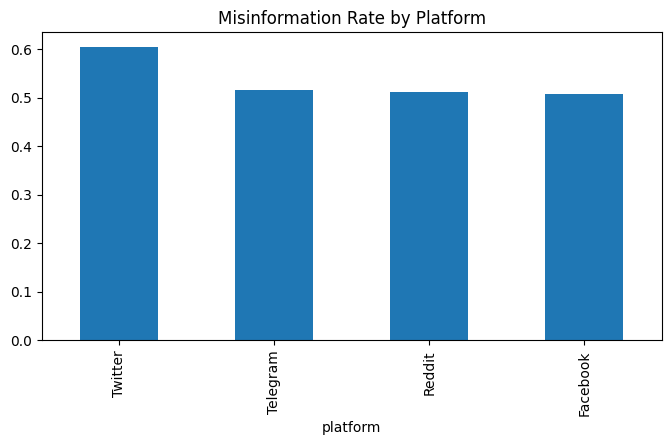

platform
Twitter     0.604651
Telegram    0.516129
Reddit      0.512397
Facebook    0.507937
Name: is_misinformation, dtype: float64

In [13]:
platform_misinfo = df.groupby('platform')['is_misinformation'].mean().sort_values(ascending=False)
platform_misinfo.plot(kind='bar', figsize=(8,4), title='Misinformation Rate by Platform')
plt.show()
platform_misinfo

### Q2 — Engagement comparison for misinformation vs authentic content

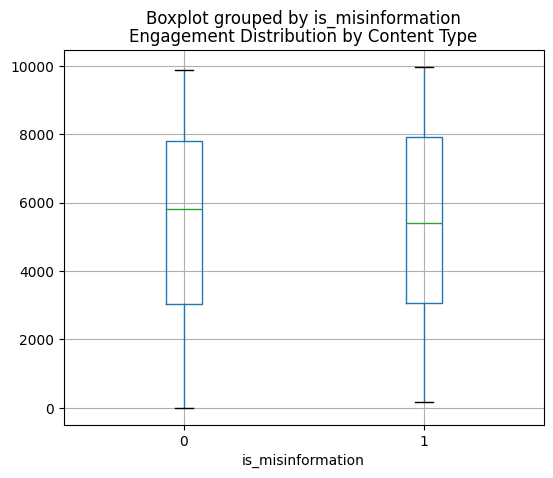

is_misinformation
0    5820.5
1    5407.5
Name: engagement, dtype: float64

In [14]:
df.boxplot(column='engagement', by='is_misinformation', figsize=(6,5))
plt.title('Engagement Distribution by Content Type')
plt.show()

df.groupby('is_misinformation')['engagement'].median()

### Q3 — Which platforms generate highest engagement for misinformation?

In [15]:
pivot = df.pivot_table(index='platform', columns='is_misinformation', values='engagement', aggfunc='median')
pivot['difference'] = pivot[1] - pivot[0]
pivot.sort_values('difference', ascending=False)

is_misinformation,0,1,difference
platform,,,
Reddit,5181.0,5996.0,815.0
Telegram,4901.5,5185.0,283.5
Facebook,6471.0,6443.5,-27.5
Twitter,5862.0,5417.0,-445.0


## 👤 5. B — User & Creator Behavior
---

### Q4 — Are verified accounts less likely to share misinformation?

In [16]:
df.groupby('author_verified')['is_misinformation'].mean()

author_verified
0    0.537849
1    0.534137
Name: is_misinformation, dtype: float64

### Q5 — Relationship between follower count & misinformation rate

/var/folders/2b/t1vzg7kd1y16_qk55mhrgf140000gn/T/ipykernel_68758/2439976322.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('followers_bin')['is_misinformation'].mean().plot(kind='bar', figsize=(8,4))


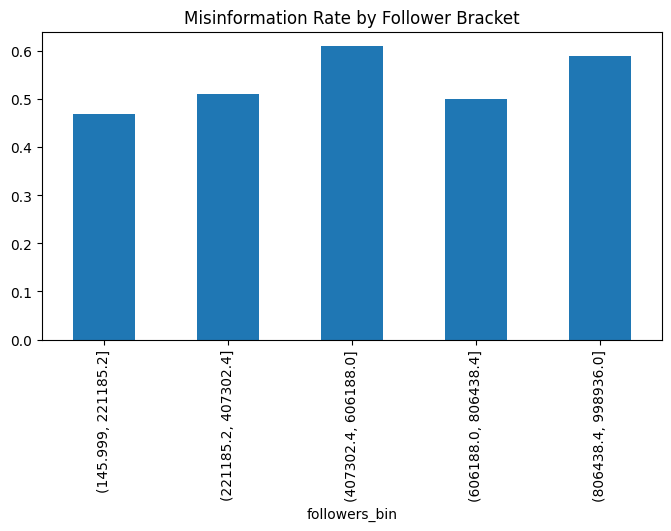

In [17]:
df['followers_bin'] = pd.qcut(df['author_followers'], 5, duplicates='drop')
df.groupby('followers_bin')['is_misinformation'].mean().plot(kind='bar', figsize=(8,4))
plt.title('Misinformation Rate by Follower Bracket')
plt.show()

### Q6 — Do synthetic/bot signals correlate with misinformation?

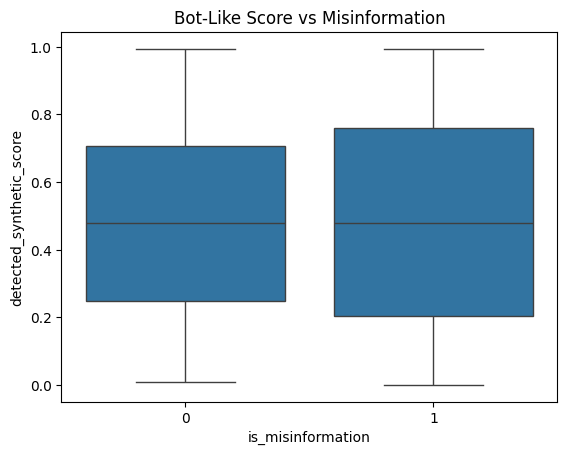

In [18]:
sns.boxplot(x='is_misinformation', y='detected_synthetic_score', data=df)
plt.title('Bot-Like Score vs Misinformation')
plt.show()

## 📝 6. C — Topic & Content Characteristics

### Q8 — Do low readability scores correlate with misinformation?

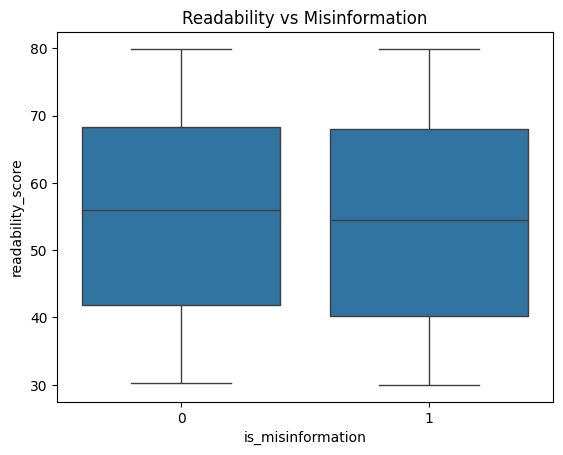

MannwhitneyuResult(statistic=np.float64(30345.5), pvalue=np.float64(0.6451307576533948))

In [20]:
sns.boxplot(x='is_misinformation', y='readability_score', data=df)
plt.title('Readability vs Misinformation')
plt.show()

stats.mannwhitneyu(df[df.is_misinformation==1]['readability_score'],
                   df[df.is_misinformation==0]['readability_score'])

### Q9 — Toxicity score correlation with misinformation

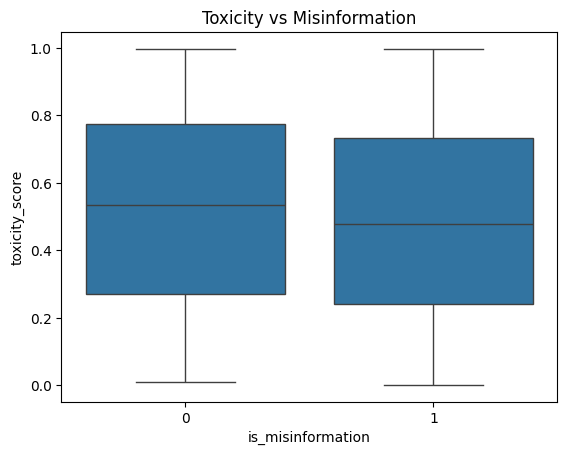

,toxicity_score,is_misinformation
toxicity_score,1.000000,-0.052611
is_misinformation,-0.052611,1.000000


In [21]:
sns.boxplot(x='is_misinformation', y='toxicity_score', data=df)
plt.title('Toxicity vs Misinformation')
plt.show()

df[['toxicity_score','is_misinformation']].corr(method='spearman')

### Q10 — Do hashtags/URLs/mentions increase misinformation likelihood?

In [22]:
df[['num_urls','num_mentions','num_hashtags','is_misinformation']].corr(method='spearman')

,num_urls,num_mentions,num_hashtags,is_misinformation
num_urls,1.000000,0.023236,-0.047205,-0.026360
num_mentions,0.023236,1.000000,-0.015836,-0.006920
num_hashtags,-0.047205,-0.015836,1.000000,0.028217
is_misinformation,-0.026360,-0.006920,0.028217,1.000000


## 🕒 7. D — Time & Trend Analysis
---

### Q11 — Misinformation trend by date

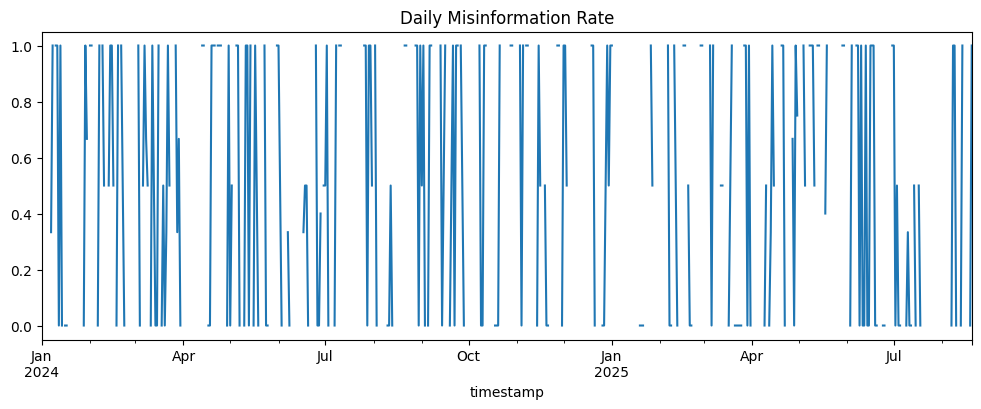

In [23]:
daily = df.resample('D', on='timestamp')['is_misinformation'].mean()
daily.plot(figsize=(12,4), title='Daily Misinformation Rate')
plt.show()

### Q12 — Misinformation by hour of day

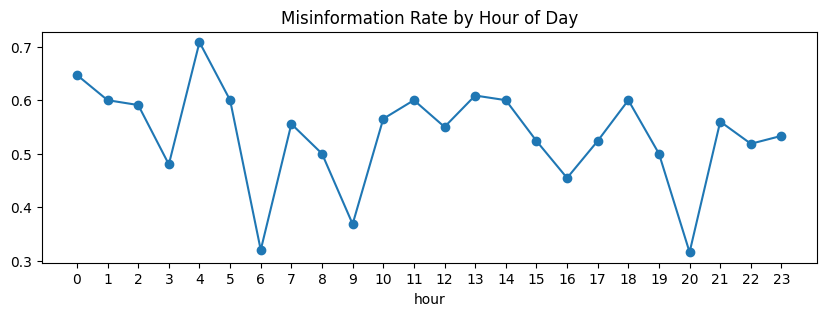

In [24]:
df.groupby('hour')['is_misinformation'].mean().plot(kind='line', marker='o', figsize=(10,3))
plt.title('Misinformation Rate by Hour of Day')
plt.xticks(range(0,24))
plt.show()

## 🌍 8. E — Geographic Analysis
---

### Q14 — Which countries have highest misinformation?

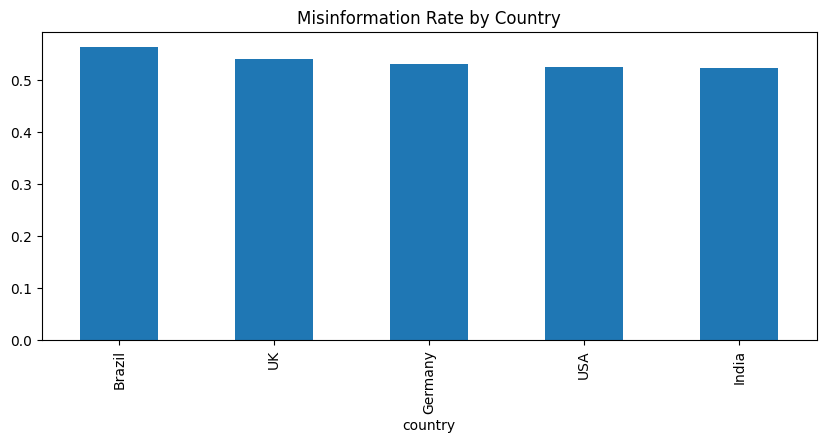

country
Brazil     0.563830
UK         0.539216
Germany    0.530973
USA        0.523810
India      0.523256
Name: is_misinformation, dtype: float64

In [25]:
country_misinfo = df.groupby('country')['is_misinformation'].mean().sort_values(ascending=False)
country_misinfo.plot(kind='bar', figsize=(10,4), title='Misinformation Rate by Country')
plt.show()
country_misinfo

### Q15 — Engagement by region

In [26]:
df.groupby('country')['engagement'].median().sort_values(ascending=False).head(10)

country
Brazil     6378.0
UK         5782.0
Germany    5641.0
USA        5447.0
India      5261.0
Name: engagement, dtype: float64

## 🧐 9. F — Fact-Checking & Reliability

### Q17 — Does fact-checking reduce engagement?

In [27]:
factcheck_cmp = df.groupby(df['external_factchecks_count'] > 0)['engagement'].median()
factcheck_cmp

external_factchecks_count
False    6323.0
True     5641.0
Name: engagement, dtype: float64

### Q18 — Agreement between model detection & fact-checker verdict

In [28]:
pd.crosstab(df['factcheck_verdict'], df['is_misinformation'], normalize='index')

is_misinformation,0,1
factcheck_verdict,,
FALSE,0.491667,0.508333
PARTLY,0.472222,0.527778
TRUE,0.404959,0.595041
UNVERIFIED,0.486957,0.513043


### Q19 — Domain reliability vs misinformation rate

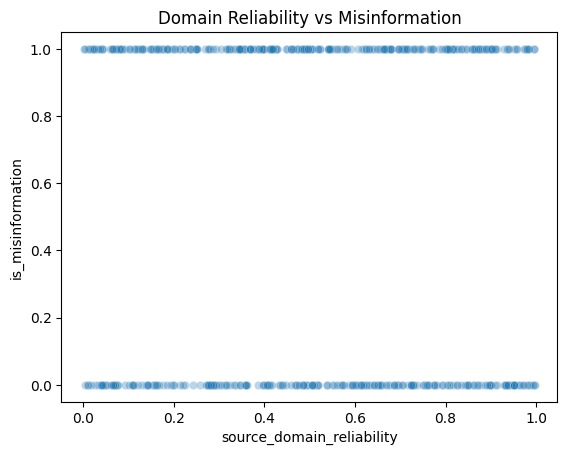

,source_domain_reliability,is_misinformation
source_domain_reliability,1.000000,-0.041441
is_misinformation,-0.041441,1.000000


In [29]:
sns.scatterplot(x='source_domain_reliability', y='is_misinformation', data=df, alpha=0.3)
plt.title('Domain Reliability vs Misinformation')
plt.show()

df[['source_domain_reliability','is_misinformation']].corr(method='spearman')

# 🎉 Notebook Complete
This notebook delivers full analysis for all business questions.